# Contents
01. Import Libraries
02. Import Datasets
03. 4.10 Final Analysis
    -  PII Data
    -   Regional Data Segmentation
    -   Low Activity Customers
    -   Customer Profiling Variables
        1. Income Levels Profile
        2. Time of Day Profile
        3. Age Group Profile
        4. Young Parent vs. Older Parent Profile
    - Profile Aggregation
    - Profile, Region, & Department Comparisons
04. Export Final Dataframe 
     
   

# 01. Import Libraries

In [22]:
!pip install seaborn matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# 02. Import Datasets

In [25]:
# Defines path as intro file path for Instacart project

path = r'/home/0668a905-109d-4403-be59-0a04abf51dd9/Instacart Basket Analysis'

In [27]:
# Imports latest customer_orders_products dataframe

ords_prods_merge = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_departments.pkl'))

In [29]:
# Set the display option to show all columns

pd.set_option('display.max_columns', None)

# 03. 4.10 Final Analysis

## PII Data

Personal information (first name, last name) were removed in 4.9 Part 1 to protect consumer identity. 

In [31]:
# Provide overview of ords_prods_merge columns and output (no personal identifying information)

ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_flag,median_order,order_frequency_flag,gender,state_name,age_customer,date_joined,number_dependants,marital_status,income,department
0,2617132,55630,6,2,15,5.0,31766,13,0,Cheese Pizza Snacks,129,1,14.3,Mid-range product,Regularly busy,Regularly busy,Most orders,50,Loyal customer,7.550000,Low spender,5.0,Frequent customer,Female,Rhode Island,29,10/5/2017,2,married,71955,frozen
47,1158288,55630,1,5,15,NaN,6377,5,0,Raspberry Chocolate Chip Gelato,37,1,5.0,Low-range product,Regularly busy,Regularly busy,Most orders,50,Loyal customer,7.550000,Low spender,5.0,Frequent customer,Female,Rhode Island,29,10/5/2017,2,married,71955,frozen
84,30342,168460,31,2,12,6.0,31766,13,1,Cheese Pizza Snacks,129,1,14.3,Mid-range product,Regularly busy,Regularly busy,Most orders,43,Loyal customer,7.696932,Low spender,7.0,Frequent customer,Female,Connecticut,75,2/1/2020,2,married,111758,frozen
120,1859900,168460,42,4,10,18.0,20995,10,1,Organic Broccoli Florets,116,1,8.3,Mid-range product,Least busy,Least busy days,Most orders,43,Loyal customer,7.696932,Low spender,7.0,Frequent customer,Female,Connecticut,75,2/1/2020,2,married,111758,frozen
121,2432960,168460,4,0,12,6.0,20995,23,0,Organic Broccoli Florets,116,1,8.3,Mid-range product,Busiest day,Busiest days,Most orders,43,Loyal customer,7.696932,Low spender,7.0,Frequent customer,Female,Connecticut,75,2/1/2020,2,married,111758,frozen


In [382]:
ords_prods_merge.shape

(6480944, 33)

## Regional Data Segmentation

In [33]:
# Using .loc function to create 'Northeast' within new 'Region' column

ords_prods_merge.loc[ords_prods_merge['state_name'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

In [35]:
# Using .loc function to create 'Midwest' within new 'Region' column

ords_prods_merge.loc[ords_prods_merge['state_name'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

In [37]:
# Using .loc function to create 'South' within new 'Region' column

ords_prods_merge.loc[ords_prods_merge['state_name'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [39]:
# Using .loc function to create 'West' within new 'Region' column

ords_prods_merge.loc[ords_prods_merge['state_name'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [41]:
# Check output of new 'region' column

ords_prods_merge[['state_name', 'region']]

,state_name,region
0,Rhode Island,Northeast
47,Rhode Island,Northeast
84,Connecticut,Northeast
120,Connecticut,Northeast
121,Connecticut,Northeast
...,...,...
6480836,South Dakota,Midwest
6480852,North Dakota,Midwest
6480863,Indiana,Midwest
6480918,Rhode Island,Northeast


In [43]:
# Create crosstab of 'region' and 'spender_flag' columns

region_spending = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['spender_flag'], dropna = False)

In [45]:
# Check output of region_spending crosstab (and add commas)

region_spending.style.format('{:,.0f}')

spender_flag,High spender,Low spender
region,,
Midwest,"40,351","1,479,527"
Northeast,"25,449","1,119,678"
South,"51,737","2,106,415"
West,"40,470","1,617,317"


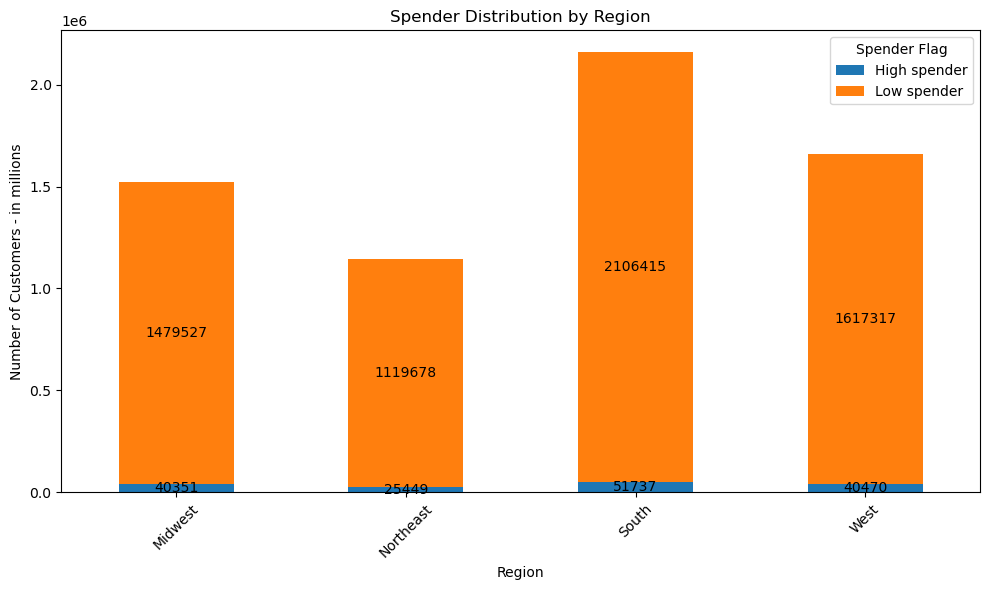

In [47]:
# Create a stacked bar chart of spender flag by region

bar_region_spender = region_spending.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title('Spender Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers - in millions')
plt.legend(title='Spender Flag')
plt.xticks(rotation=45)

# Add value labels on the bars
for c in bar_region_spender.containers:
    bar_region_spender.bar_label(c, fmt='%.0f', label_type='center')

# Adjust layout and display the chart
plt.tight_layout()

### Notes:

From checking the crosstab & stacked bar chart, we can see that the South has the highest number of High and Low spenders, followed by the West. The northeast has both the smallest number of high and low spenders.

In [49]:
# Export outside Jupyter in the form of an image file

bar_region_spender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spender.png'))

## Low Activity Customers

In [51]:
# Apply .loc to create new column 'activity_flag' for "Low activity"

ords_prods_merge.loc[ords_prods_merge['median_order'] < 5, 'activity_flag'] = 'Low activity'

In [53]:
# Apply .loc to create new column 'activity_flag' for "High activity"

ords_prods_merge.loc[ords_prods_merge['median_order'] >= 5, 'activity_flag'] = 'High activity'

In [55]:
# Check output of activity_flag

ords_prods_merge[['median_order', 'activity_flag']]

,median_order,activity_flag
0,5.0,High activity
47,5.0,High activity
84,7.0,High activity
120,7.0,High activity
121,7.0,High activity
...,...,...
6480836,2.5,Low activity
6480852,2.0,Low activity
6480863,27.0,High activity
6480918,30.0,High activity


In [57]:
# Create new dataframe 'ic_final' that filters out the 'Low activity' customers

ic_final = ords_prods_merge[ords_prods_merge['activity_flag'] != 'Low activity']

In [59]:
# Check if all values in 'activity_flag' are 'High activity'

print(ords_prods_merge['activity_flag'].unique())

['High activity' 'Low activity' 'nan']


In [61]:
# Export the high activity only dataframe as pickle

ic_final.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ic_final.pkl'))

## Customer Profiling Variables

The following customer profiles & distributions have been created for various cross-analyses:

#### 1. Income Level Profile
#### 2. Time of Day Profile
#### 3. Age Group Profile
#### 4. Young Parent vs. Older Parent Profile


### 1. Income Levels Profile

In [63]:
# Using .loc function to create 'Low income' within new 'income_flag' column

ic_final.loc[ic_final['income'] < 50000, 'income_flag'] = 'Low Income'

/tmp/ipykernel_3256/833947117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ic_final.loc[ic_final['income'] < 50000, 'income_flag'] = 'Low Income'


In [65]:
# Using .loc function to create 'Mid income' within new 'income_flag' column

ic_final.loc[(ic_final['income'] >= 50000) & (ic_final['income'] < 150000), 'income_flag'] = 'Mid Income'

In [67]:
# Using .loc function to create 'High income' within new 'income_flag' column

ic_final.loc[ic_final['income'] > 150000, 'income_flag'] = 'High Income'

In [69]:
# Get value counts of Income_flag

income_level_distribution = ic_final['income_flag'][ic_final['income_flag'] != 'nan'].value_counts()

In [409]:
# Check frequency of income_flag

ic_final['income_flag'].value_counts(dropna = False)

income_flag
Mid Income     4215215
High Income     687403
Low Income      626250
nan                153
Name: count, dtype: int64

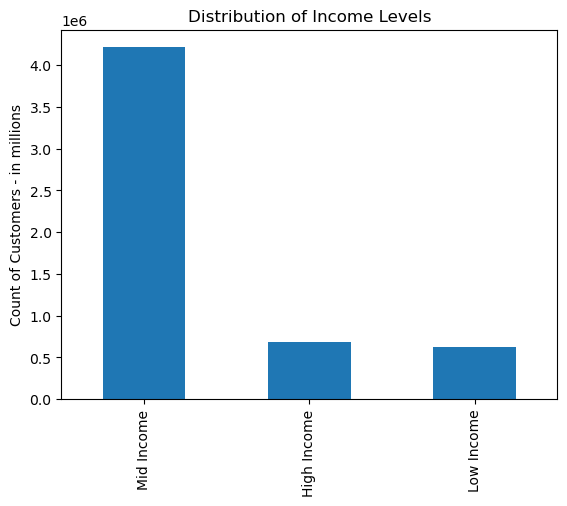

In [71]:
# Create bar chart of income level distributions

bar_income_level_distribution = income_level_distribution.plot.bar()
plt.title('Distribution of Income Levels')
plt.xlabel('')
plt.ylabel('Count of Customers - in millions')
plt.show()

### 2. Time of Day Profile

In [194]:
# Using .loc function to create 'Morning shopper' within new 'time_flag' column

ic_final.loc[ic_final['order_hour_of_day'].isin([6,7,8,9,10,11]), 'time_flag'] = 'Morning shopper'

In [197]:
# Using .loc function to create 'Afternoon shopper' within new 'time_flag' column

ic_final.loc[ic_final['order_hour_of_day'].isin([12,13,14,15,16,17]), 'time_flag'] = 'Afternoon shopper'

In [200]:
# Using .loc function to create 'Evening shopper' within new 'time_flag' column

ic_final.loc[ic_final['order_hour_of_day'].isin([18,19,20,21,22,23]), 'time_flag'] = 'Evening shopper'

In [203]:
# Using .loc function to create 'Insomniac shopper' within new 'time_flag' column

ic_final.loc[ic_final['order_hour_of_day'].isin([0,1,2,3,4,5]), 'time_flag'] = 'Insomniac shopper'

In [206]:
# Get value counts of time_flag

time_of_day_distribution = ic_final['time_flag'].value_counts()

In [405]:
# Check time_flag 
ic_final['time_flag'].value_counts(dropna = False)

time_flag
Afternoon shopper    2620179
Morning shopper      1825035
Evening shopper       982538
Insomniac shopper     101269
Name: count, dtype: int64

/tmp/ipykernel_3256/1620944192.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  time_of_day_distribution_bar.set_yticklabels(['{:,}'.format(int(x)) for x in y_current_values])


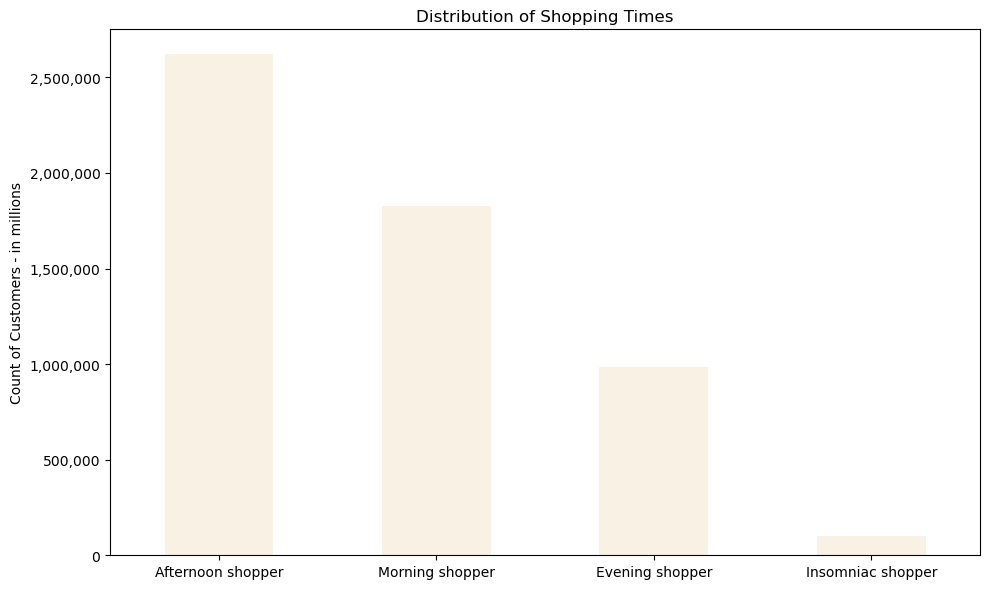

In [235]:
# Create bar chart of time of day shopping distributions

# Set figure size to make it wider
plt.figure(figsize=(10, 6)) 

time_of_day_distribution_bar = time_of_day_distribution.plot.bar(color='#FAF1E5')
plt.title('Distribution of Shopping Times')
plt.xlabel('')
plt.ylabel('Count of Customers - in millions')

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')  # Change 'axis' to 'x' if needed for x-axis

# Set x-axis labels to be horizontal
plt.xticks(rotation=0)

# Format x-axis ticks with commas
y_current_values = time_of_day_distribution_bar.get_yticks()  

# Get current x-tick values
time_of_day_distribution_bar.set_yticklabels(['{:,}'.format(int(x)) for x in y_current_values]) 

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [239]:
# Export outside Jupyter in the form of an image file

time_of_day_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'time_of_day_distribution_bar.png'))

### 3. Age Group Profile

In [85]:
# Print min/max age of customers

age_stats = ic_final['age_customer'].agg(['min', 'max'])
print(age_stats)

min    18
max    81
Name: age_customer, dtype: int64


In [87]:
# Using .loc function to create 'Under 25' within new 'ages_flag' column

ic_final.loc[(ic_final['age_customer'] < 25), 'ages_flag'] = 'Under 25'

/tmp/ipykernel_3256/2294367884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ic_final.loc[(ic_final['age_customer'] < 25), 'ages_flag'] = 'Under 25'


In [89]:
# Using .loc function to create 'Adults 25 - 44' within new 'ages_flag' column

ic_final.loc[(ic_final['age_customer'] >= 25) & (ic_final['age_customer'] < 44), 'ages_flag'] = 'Adults 25 - 44'

In [91]:
# Using .loc function to create 'Middle Aged 45 - 64' within new 'ages_flag' column

ic_final.loc[(ic_final['age_customer'] >= 45) & (ic_final['age_customer'] < 64), 'ages_flag'] = 'Middle Aged 45 - 64'

In [93]:
# Using .loc function to create '50 year olds' within new 'ages_flag' column

ic_final.loc[(ic_final['age_customer'] >= 65), 'ages_flag'] = 'Senior 65+'

In [95]:
# Get value counts of ages_flag

ages_distribution = ic_final['ages_flag'][ic_final['ages_flag'] != 'nan'].value_counts()

In [401]:
# Check ages_flag

ic_final['ages_flag'].value_counts(dropna = False)

ages_flag
Adults 25 - 44         1648049
Middle Aged 45 - 64    1638069
Senior 65+             1458587
Under 25                607087
nan                     177229
Name: count, dtype: int64

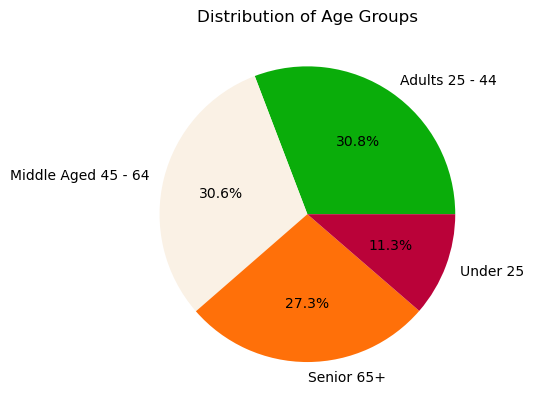

In [243]:
# Create bar chart of age group distributions

ages_distribution_pie = ages_distribution.plot.pie(autopct='%1.1f%%', colors=['#0AAD0A','#FAF1E5','#FF7009','#BA0239','#FF7009'])
plt.title('Distribution of Age Groups')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [246]:
# Export outside Jupyter in the form of an image file

ages_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ages_distribution_pie.png'))

### 4. Young Parent vs. Older Parent Profile

In [99]:
# Using .loc function to create 'Young parent' within new 'parent_age_flag' column

ic_final.loc[(ic_final['age_customer'] < 35) & (ic_final['number_dependants'].isin([1,2,3])), 'parent_age_flag'] = 'Young parent'

/tmp/ipykernel_3256/2556975355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ic_final.loc[(ic_final['age_customer'] < 35) & (ic_final['number_dependants'].isin([1,2,3])), 'parent_age_flag'] = 'Young parent'


In [101]:
# Using .loc function to create 'Older parent' within new 'parent_age_flag' column

ic_final.loc[(ic_final['age_customer'] >= 35) & (ic_final['age_customer'] < 60) & (ic_final['number_dependants'].isin([1,2,3])), 'parent_age_flag'] = 'Older parent'

In [103]:
# Using .loc function to create 'Much older parent' within new 'parent_age_flag' column

ic_final.loc[(ic_final['age_customer'] >= 60) & (ic_final['number_dependants'].isin([1,2,3])), 'parent_age_flag'] = 'Much older parent'

In [105]:
# Using .loc function to create 'Not a  parent' within new 'parent_age_flag' column

ic_final.loc[(ic_final['number_dependants'].isin([0])), 'parent_age_flag'] = 'Not a parent'

In [107]:
# Get value counts of parent_age_flag

parent_age_distribution = ic_final['parent_age_flag'][ic_final['parent_age_flag'] != 'Not a parent'].value_counts()

In [397]:
# Check frequency of parent_age_flag

ic_final['parent_age_flag'].value_counts(dropna = False)

parent_age_flag
Older parent         1630958
Much older parent    1414400
Not a parent         1378588
Young parent         1105075
Name: count, dtype: int64

/tmp/ipykernel_3256/2713259271.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  parent_age_groups_bar.set_yticklabels(['{:,}'.format(int(x)) for x in y_age_current_values])


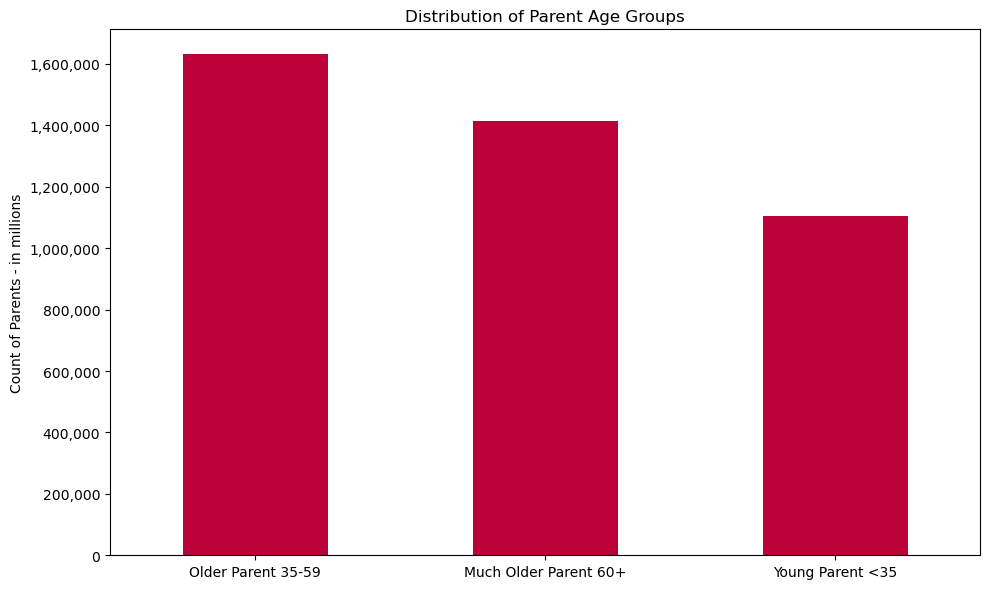

In [303]:
# Create bar chart of parent age distributions

# Set figure size to make it wider
plt.figure(figsize=(10, 6)) 

parent_age_groups_bar = parent_age_distribution.plot.bar(color=['#BA0239'])
plt.title('Distribution of Parent Age Groups')
plt.xlabel('')
plt.ylabel('Count of Parents - in millions')

# Custom x-axis labels
age_custom_labels = ['Older Parent 35-59', 'Much Older Parent 60+', 'Young Parent <35'] 
# Define  custom labels
parent_age_groups_bar.set_xticklabels(age_custom_labels)

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')  

# Set x-axis labels to be horizontal
plt.xticks(rotation=0)

# Format y-axis ticks with commas
y_age_current_values = parent_age_groups_bar.get_yticks()  

# Get current y-tick values
parent_age_groups_bar.set_yticklabels(['{:,}'.format(int(x)) for x in y_age_current_values]) 

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [269]:
# Export outside Jupyter in the form of an image file

parent_age_groups_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_age_groups_bar.png'))

## Profile Aggregation

### - Parent Age Groups by Usage & Expenditure

In [111]:
# Aggregate variables for parent age groups by usage & expenditure

parent_age_agg = ic_final.groupby('parent_age_flag').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [113]:
# Check parent_age_agg output

parent_age_agg

order_number                  prices                
                           max min       mean      max  min       mean
parent_age_flag                                                       
Much older parent           98   1  14.002972  99999.0  1.0  11.599234
Not a parent                99   1  14.085771  99999.0  1.0  11.384678
Older parent                99   1  14.074329  99999.0  1.0  12.321063
Young parent                99   1  14.092892  99999.0  1.0  12.535662

### - Time of Day Shoppers by Usage & Expenditure

In [115]:
# Aggregate variables for time of day shoppers by usage & expenditure

time_of_day_agg = ic_final.groupby('time_flag').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [117]:
# Check time_of_day_agg

time_of_day_agg

order_number                  prices                
                           max min       mean      max  min       mean
time_flag                                                             
Afternoon shopper           99   1  13.701145  99999.0  1.0  12.097051
Evening shopper             95   1  13.473267  99999.0  1.0  12.331640
Insomniac shopper           85   1  13.231265  99999.0  1.0  11.828138
Morning shopper             99   1  14.945058  99999.0  1.0  11.527534

## Profile, Region, & Department Comparisons

### - Age Groups vs Loyalty

In [275]:
# Create crosstab of 'ages_flag' and 'loyalty_flag' columns

age_group_loyalty = pd.crosstab(
    ic_final['ages_flag'][ic_final['ages_flag'] != 'nan'], 
    ic_final['loyalty_flag'][ic_final['loyalty_flag'] != 'nan'], 
    dropna=True
)

In [278]:
# Check output of age_group_loyalty crosstab (and add commas)

age_group_loyalty.style.format('{:,.0f}')

loyalty_flag,Loyal customer,New customer,Regular customer
ages_flag,,,
Adults 25 - 44,"385,155","364,374","898,520"
Middle Aged 45 - 64,"383,680","364,220","890,169"
Senior 65+,"337,275","325,228","796,084"
Under 25,"139,665","134,777","332,645"


/tmp/ipykernel_3256/3249054568.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in y_aloyal_current_values])


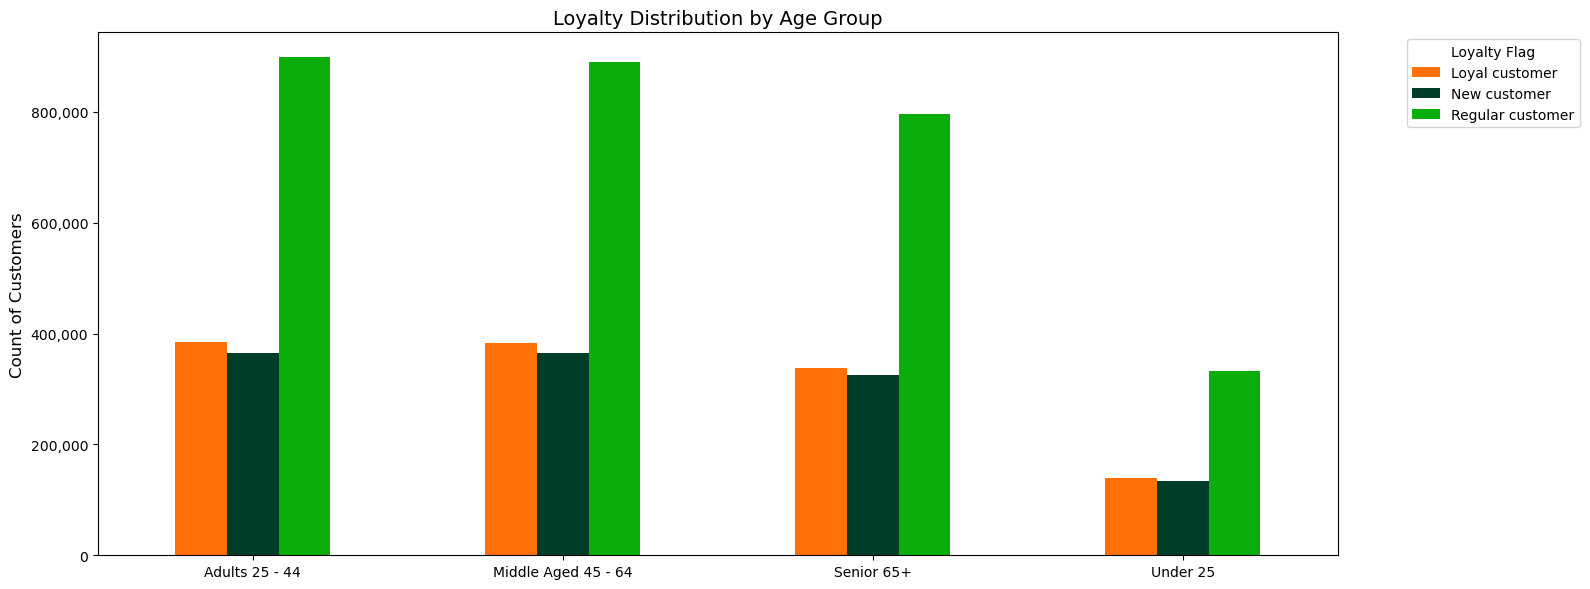

In [345]:
# Create grouped bar plot of age group and loyalty

# Create figure and axes with more width
fig, ax = plt.subplots(figsize=(16, 6))

# Define a list of colors for each loyalty flag
age_loyalty_colors = ['#FF7009', '#003D29', '#0AAD0A']

# Create grouped bar plot of age group and loyalty
age_group_loyalty_bar = age_group_loyalty.plot(kind='bar', color=age_loyalty_colors, ax=ax)

# Customize the plot
ax.set_title('Loyalty Distribution by Age Group', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Count of Customers', fontsize=12)

# Adjust legend
ax.legend(title='Loyalty Flag', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Set x-axis labels to be slightly rotated and adjust font size
plt.xticks(rotation=0, fontsize=10)

# Format y-axis ticks with commas
y_aloyal_current_values = ax.get_yticks()  
ax.set_yticklabels(['{:,}'.format(int(x)) for x in y_aloyal_current_values])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [348]:
# Export outside Jupyter in the form of an image file

age_group_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_loyalty_bar.png'))

### - Parent Ages vs Loyalty

In [123]:
# Create crosstab of 'parent_age_flag' and 'loyalty_flag' columns

parent_age_loyalty = pd.crosstab(ic_final['parent_age_flag'], ic_final['loyalty_flag'], dropna = True)

In [124]:
# Check output of age_group_loyalty crosstab (and add commas)

parent_age_loyalty.style.format('{:,.0f}')

loyalty_flag,Loyal customer,New customer,Regular customer
parent_age_flag,,,
Much older parent,"328,678","317,104","768,618"
Not a parent,"321,033","306,357","751,198"
Older parent,"380,767","359,857","890,334"
Young parent,"255,980","244,468","604,627"


/tmp/ipykernel_3256/1625331635.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in y_ployal_current_values])


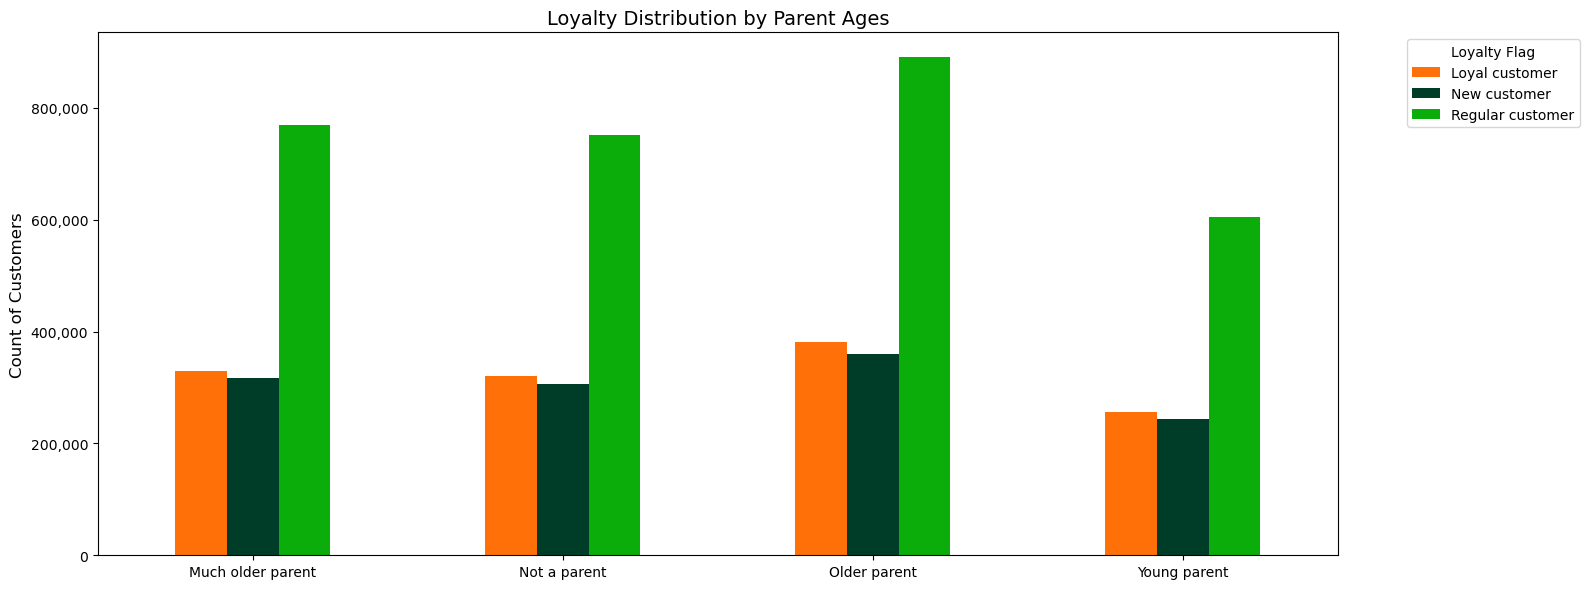

In [351]:
# Create grouped bar plot of parent ages and loyalty

# Create figure and axes with more width
fig, ax = plt.subplots(figsize=(16, 6))

# Define a list of colors for each loyalty flag
parent_loyalty_colors = ['#FF7009', '#003D29', '#0AAD0A']

# Create grouped bar plot of age group and loyalty
parent_group_loyalty_bar = parent_age_loyalty.plot(kind='bar', color=parent_loyalty_colors, ax=ax)

# Customize the plot
ax.set_title('Loyalty Distribution by Parent Ages', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Count of Customers', fontsize=12)

# Adjust legend
ax.legend(title='Loyalty Flag', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Set x-axis labels to be slightly rotated and adjust font size
plt.xticks(rotation=0, fontsize=10)

# Format y-axis ticks with commas
y_ployal_current_values = ax.get_yticks()  
ax.set_yticklabels(['{:,}'.format(int(x)) for x in y_ployal_current_values])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [354]:
# Export outside Jupyter in the form of an image file

parent_group_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_group_loyalty_bar.png'))

In [379]:
ic_final.shape

(5529021, 37)

# 04. Export Final Dataframe

In [365]:
# Export ic_final as pickle

ic_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ic_final.pkl'))